In [3]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Exercise 1

The VC dimension is $l$. 

In a worst case scenario, every leaf can be used to predict one unique point since each leaf can accomodate whichever of the two labels for each point. When there are $l+1$ points, in the worst case scenario there will need to be one leaf that predicts two points. Since it needs to shatter every combination, when those two points belong to different classes, the decision tree will fail to shatter $l+1$ points. 

### Exercise 2

#### Part 1

Our likelihood is:
$$ L(\alpha, \beta) = \prod_i^M P(d_i | \alpha, \beta) $$

$$ = \prod_i^M \prod_n^N p_{ni}^{q(w_n, d_i)} $$

$$ L(\alpha, \beta) = \prod_i^M \prod_n^N (\sum_k^K \beta_{kn} \alpha_{ik} ) ^ {q(w_n, d_i)} $$

The log likelihood is:
$$ l(\alpha, \beta) = log(L(\alpha, \beta) $$
$$ = log [\prod_i^M \prod_n^N (\sum_k^K \beta_{kn} \alpha_{ik} ) ^ {q(w_n, d_i)}] $$

Since the log of products is equivalent to the sum of logs:
$$ l(\alpha, \beta) = \sum_i^M \sum_n^N  q(w_n, d_i) \cdot log(\sum_k^K \beta_{kn} \alpha_{ik} ) $$

#### Part 2

For simplicity of notation, it is implicitly meant that $\alpha = \alpha^{old}$ and $\beta = \beta^{old}$ for this part only

By Bayes' Rule:
$$ P(z_k | d_i, w_n, \alpha, \beta) = \frac{P(z_k, d_i, w_n | \alpha, \beta)}{P(d_i, w_n | \alpha, \beta)} $$

Based on law of total probability:

$$ = \frac{P(d_i, w_n | z_k, \alpha, \beta) P(z_k | \alpha, \beta)}{P(d_i, w_n |\alpha, \beta)}$$

$$ = \frac{P(w_n | z_k, d_i, \alpha, \beta) P(d_i | z_k, \alpha, \beta) P(z_k | \alpha, \beta)}{P(d_i, w_n |\alpha, \beta)}$$

$$ = \frac{P(w_n | z_k, d_i, \alpha, \beta) P(z_k | d_i, \alpha, \beta) P(d_i | \alpha, \beta)}{P(d_i, w_n |\alpha, \beta)}$$

Since we know that $P(w_n | z_k, d_i, \alpha, \beta) = \beta_{kn}$ and  $P(z_k | d_i, \alpha, \beta) = \alpha_{ik}$ 

$$ = \frac{\beta_{kn}\alpha_{ik}P(d_i | \alpha, \beta)}{P(d_i, w_n | \alpha, \beta)} $$

$$ = \frac{\beta_{kn}\alpha_{ik}P(d_i | \alpha, \beta)}{P(w_n | d_i, \alpha, \beta)P(d_i | \alpha, \beta)} $$

$$ = \frac{\beta_{kn}\alpha_{ik}}{P(w_n | d_i, \alpha, \beta)} $$

The probability of word n appears given document i is given as $\sum_k^K \beta_{kn}\alpha_{ik}$

The $k'$ subscript is to differentiate from the $k$ in the numerator:

$$ P(z_k | d_i, w_n, \alpha, \beta) = \frac{\beta_{kn}\alpha_{ik}}{\sum_{k'}^K \beta_{k'n}\alpha_{ik'}} $$

Rewriting with the expanded notation with the old superscript:
$$ \Rightarrow P(z_k | d_i, w_n, \alpha^{old}, \beta^{old}) = \frac{\beta_{kn}^{old}\alpha_{ik}^{old}}{\sum_{k'}^K \beta_{k'n}^{old}\alpha_{ik'}^{old}} $$

#### Part 3

As derived in part 1:
$$ l(\alpha, \beta) = \sum_i^M \sum_n^N  q(w_n, d_i) \cdot log(\sum_k^K \beta_{kn} \alpha_{ik} ) $$

Multiplying and dividing by $\gamma_{ink}$ within the log term:
$$ = \sum_i^M \sum_n^N  q(w_n, d_i) \cdot log(\sum_k^K\frac{ \gamma_{ink}\beta_{kn} \alpha_{ik} }{\gamma_{ink}}) $$

Since $\sum_k^K\gamma_{ink} = \mathbb{E_z} $:
$$ = \sum_i^M \sum_n^N  q(w_n, d_i) \cdot log( \mathbb{E_z} \frac{ \beta_{kn} \alpha_{ik} }{\gamma_{ink}}) $$

Since $ log(x)$ is a concave function, and by Jensen's inequality which states generally for a concave function, $log(\mathbb{E}X) \geq \mathbb{E}log(X)$:

$$  \geq \sum_i^M \sum_n^N \sum_k^K  q(w_n, d_i) \cdot \gamma_{ink} \cdot log(\frac{\beta_{kn} \alpha_{ik} }{\gamma_{ink}}) $$

Therefore we have proven the lower bound

#### Part 4

First finding $\alpha_{new}$, setting up the Lagrangian based on the constranit $ \sum_k^K \alpha_{ik} = 1$
$$ L(\theta, \theta_t) = A(\theta, \theta_t) + \lambda (1 -  \sum_k^K \alpha_{ik})$$

$$ \frac{\partial L(\theta, \theta_t)}{\partial \alpha_{ik}}  = \frac{\partial A(\theta, \theta_t)}{\partial \alpha_{ik}} - \lambda $$

$$ = \frac{\partial}{\partial \alpha_{ik}} [\sum_n^N  q(w_n, d_i) \cdot \gamma_{ink} \cdot log(\frac{\beta_{kn} \alpha_{ik} }{\gamma_{ink}})] - \lambda $$

$$ = \frac{\sum_n^N q(w_n, d_i) \gamma_{ink}}{\alpha_{ik}} - \lambda $$

Setting the partial derivative to $0$ and solving for $\alpha_{ik}$
$$ \frac{\sum_n^N q(w_n, d_i) \gamma_{ink}}{\alpha_{ik}} - \lambda = 0 $$

$$ \alpha_{ik}^{new}= \frac{\sum_n^N q(w_n, d_i) \gamma_{ink}}{\lambda}  $$

Since we know that $ \sum_k^K \alpha_{ik} = 1$, for a given $i$, using the $k'$ subscript to differentiate between $k$ in numerator:
$$ \lambda_i = \sum_{k'}^K \sum_n^N q(w_n, d_i) \gamma_{ink'}$$

Therefore: 
$$ \alpha_{ik}^{new}= \frac{\sum_n^N q(w_n, d_i) \gamma_{ink}}{\sum_{k'}^K \sum_n^N q(w_n, d_i) \gamma_{ink'}}  $$

Then finding $\beta_{new}$, based on the constraint $ \sum_i^M \beta_{kn} = 1$
$$ L(\theta, \theta_t) = A(\theta, \theta_t) + \lambda (1 -  \sum_i^M \beta_{kn})$$

$$ \frac{\partial L(\theta, \theta_t)}{\partial \beta_{kn}}  = \frac{\partial A(\theta, \theta_t)}{\partial \beta_{kn}} - \lambda $$

$$ = \frac{\partial}{\partial \beta_{kn}} [\sum_i^M  q(w_n, d_i) \cdot \gamma_{ink} \cdot log(\frac{\beta_{kn} \alpha_{ik} }{\gamma_{ink}})] - \lambda $$

$$ = \frac{\sum_i^M q(w_n, d_i) \gamma_{ink}}{\beta_{kn}} - \lambda $$

Setting the partial derivative to $0$ and solving for $\beta_{kn}$
$$ \frac{\sum_i^M q(w_n, d_i) \gamma_{ink}}{\beta_{kn}} - \lambda = 0 $$

$$ \beta_{kn}^{new}= \frac{\sum_i^M q(w_n, d_i) \gamma_{ink}}{\lambda}  $$

Since we know that $ \sum_n^N \beta_{kn} = 1$, for a given $k$, using the $n'$ subscript to differentiate between $n$ in numerator:
$$ \lambda_k = \sum_{n'}^N \sum_i^M q(w_n, d_i) \gamma_{ink'}$$

Therefore: 
$$ \beta_{ik}^{new}= \frac{\sum_i^M q(w_n, d_i) \gamma_{ink}}{\sum_{n'}^N \sum_i^M q(w_n, d_i) \gamma_{ink'}}  $$

### Exercise 3

#### Part 1

To find $\frac{\partial L}{\partial W_1}$, where $L = - \sum_i^N y_i log(f(x_i)) + (1-y_i)log(1-f(x_i))$, 
this is equivalent to the chain rule of:

$$\frac{\partial L}{\partial \textbf{W}_1} = \frac{\partial L}{\partial \textbf{h}_3}\cdot \frac{\partial \textbf{h}_3}{\partial \textbf{z}_3} \cdot\frac{\partial \textbf{z}_3}{\partial \textbf{h}_2} \cdot \frac{\partial \textbf{h}_2}{\partial \textbf{z}_2} \cdot \frac{\partial \textbf{z}_2}{\partial \textbf{h}_1} \cdot \frac{\partial \textbf{h}_1}{\partial \textbf{z}_1} \cdot \frac{\partial \textbf{z}_1}{\partial \textbf{W}_1}$$

Breaking this apart - since $\textbf{z}$ is defined as $\textbf{z}_l = \textbf{W}_l^T\textbf{h}_{l-1} + \textbf{b}_l$:
$$ \frac{\partial \textbf{z}_l}{\partial \textbf{h}_{l-1}} = \textbf{W}_l^T $$

Therefore in order to preserve dimensions where $\textbf{W}^T$ is a matrix and $\frac{\partial L}{\partial \textbf{z}_{l}}$ is a vector:

$$ \frac{\partial L}{\partial \textbf{h}_{l-1}} = \textbf{W}_l^T  \frac{\partial L}{\partial \textbf{z}_{l}}$$

To build upon that, now looking at $\frac{\partial L}{\partial \textbf{z}_{l-1}}$:

$$ \frac{\partial L}{\partial \textbf{z}_{l-1}}  = \frac{\partial L}{\partial \textbf{h}_{l-1}} \odot \frac{\partial \textbf{h}_{l-1}}{\partial \textbf{z}_{l-1}}$$

The $\odot$ is used here since both terms are vectors, and so it represent elementwise multiplication

Based on the property of sigmoid functions, we know that where $\textbf{h}_l = \sigma(\textbf{z}_l)$:
$$ \frac{\partial \textbf{h}_l}{\partial \textbf{z}_l} = \textbf{h}_l (1-\textbf{h}_l) $$

Therefore: 
$$ \frac{\partial L}{\partial \textbf{z}_{l-1}} = \textbf{W}_l^T  \frac{\partial L}{\partial \textbf{z}_{l}} \odot [ \textbf{h}_{l-1} (1-\textbf{h}_{l-1})]$$

Finally:
$$\frac{\partial \textbf{z}_1}{\partial \textbf{W}_1}  = \textbf{x}^T$$

Putting this altogether: 
$$ \frac{\partial L}{\partial \textbf{W}_{1}} = \textbf{x}^T \cdot \textbf{W}_2^T  \cdot \frac{\partial L}{\partial \textbf{z}_{2}} \odot [ \textbf{h}_{1} (1-\textbf{h}_{1})]$$

#### Part 2

Given the results from above, the general form can be derived as 
$$ \delta^i_l = W^T_{l+1} \cdot \delta^i_{l+1}  \odot \frac{\partial h_l}{\partial z_l}$$

where $\odot$ represents the elementwise product of vectors

### Exercise 4

#### Part 1

In [4]:
mall_df = pd.read_csv('mall_customers.csv')

Text(0, 0.5, 'Spending Score')

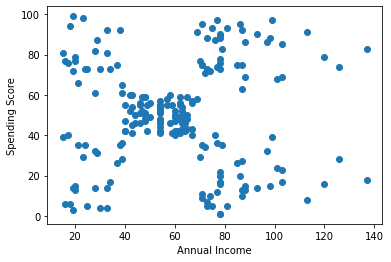

In [5]:
plt.scatter(mall_df.Annual_Income, mall_df.Spending_Score)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

#### Part 2

Based on the plot above, there appears to be $k=5$ clusters. 

In [6]:
def calc_euclid(x, y):
    return np.sqrt(np.sum([(a-b)*(a-b) for a, b in zip(x, y)])) 

In [7]:
def k_means(k, df):
    assign_new_all  = []
    centers_all = []
    sum_ds = []
    
    for t in range(100):
        # randomly pick k points from df to intialize centers
        centers = df.sample(n= k, replace = False)

        assign_last = np.ones(len(df))
        assign_new = np.zeros(len(df))

        # while cluster assignment doesn't change 
        while((assign_last != assign_new).any()):
            assign_last = assign_new

            # calculate distance between each point and center 
            # -> assign to minimum distance 
            for i in range(len(df)):
                distances_i = [calc_euclid(df.iloc[i], centers.iloc[j]) 
                               for j in range(len(centers))]
                assign_new[i] = np.argmin(distances_i)

            # recalculate cluster centers 
            for j in range(len(centers)):
                df_k = df.iloc[np.where(assign_new == j)]
                # assign mean 
                centers.iloc[j] = df_k.agg('mean')
        
        # calculate within cluster sum to centroid 
        sum_di = 0
        for c in range(k):
            df_c = df.iloc[np.where(assign_new == c)]
            wcsd = [calc_euclid(df_c.iloc[z], centers.iloc[c]) 
                    for z in range(len(df_c))]
            sum_di += np.sum(wcsd)
            
        
        assign_new_all.append(assign_new)
        centers_all.append(centers)
        sum_ds.append(sum_di)
        
    
    # return corresponding to minimized metric
    return [assign_new_all[np.argmin(sum_ds)], 
            centers_all[np.argmin(sum_ds)], 
            np.min(sum_ds)]

In [8]:
assignments_t, centers_t, min_sum_ds = k_means(5, mall_df)

In [9]:
assignments_t

array([0., 2., 0., 2., 2., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0.,
       2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2.,
       0., 2., 0., 2., 1., 2., 1., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1.,
       2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 3., 1., 3., 1., 3., 4., 3., 4., 3., 1., 3., 4., 3.,
       4., 3., 4., 3., 4., 3., 1., 3., 4., 3., 1., 3., 4., 3., 4., 3., 4.,
       3., 4., 3., 4., 3., 4., 3., 1., 3., 4., 3., 4., 3., 4., 3., 4., 3.,
       4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4.,
       3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3.])

In [10]:
centers_t

,Annual_Income,Spending_Score
8,24.166667,17.555556
100,55.987952,47.481928
31,28.357143,74.321429
123,86.538462,82.128205
144,89.406250,15.593750


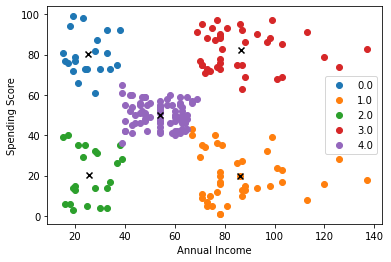

In [212]:
fig, ax = plt.subplots()
for a in np.unique(assignments_t):
    i = np.where(assignments_t == a)
    # add scatter
    ax.scatter(mall_df.Annual_Income.iloc[i], 
               mall_df.Spending_Score.iloc[i], label=a)
    # add center 
    ax.scatter(centers_t.Annual_Income.iloc[int(a)],
               centers_t.Spending_Score.iloc[int(a)], 
               marker = 'x', c = 'black')
ax.legend()
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

These clusters represent the spending habits of people relative to their wealth. We have those that are very stingy in the bottom right where they earn a lot but spend very little. Those in the upward diagonal (bottom left, middle, and top right) spend proportional to how much they make, and the ones on the top left are arguable irresponsibly spending more relative to what they earn. 

#### Part 3

In [97]:
kmeans = KMeans(n_clusters=5, random_state=10).fit(mall_df)
kmeans_preds =  kmeans.predict(mall_df)
kmeans_centers = kmeans.cluster_centers_

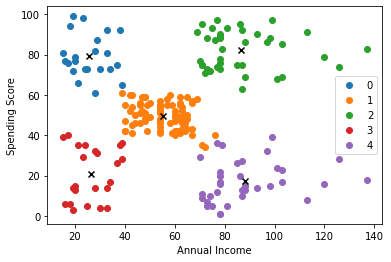

In [102]:
fig, ax = plt.subplots()
for a in np.unique(kmeans_preds):
    i = np.where(kmeans_preds == a)
    # add scatter
    ax.scatter(mall_df.Annual_Income.iloc[i], 
               mall_df.Spending_Score.iloc[i], label=a)
    # add center 
    ax.scatter(kmeans_centers[int(a), 0],
               kmeans_centers[int(a), 1], 
               marker = 'x', c = 'black')
ax.legend()
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [208]:
sum_sk_di = 0
for c in range(len(kmeans_centers)):
    df_c = mall_df.iloc[np.where(kmeans_preds == c)]
    wcsd = [calc_euclid(df_c.iloc[z], kmeans_centers[c]) 
            for z in range(len(df_c))]
    sum_sk_di += np.sum(wcsd)

In [217]:
print('The total sum within cluster distance to centroid for my implementation was ' + str(round(min_sum_ds,3)) + ' and the same for sklearn implementation was ' + str(round(sum_sk_di,3)))

The total sum within cluster distance to centroid for my implementation was 2634.601 and the same for sklearn implementation was 2604.025


Therefore, sklearn minimizes this distance slightly better but the values are very close and based on the graph most of the assignments are the same between the two implementations. 

#### Part 4

In [11]:
def calc_l1_norm(x, y):
    return np.sum([np.absolute((a-b)) for a, b in zip(x, y)])

In [12]:
def k_medians(k, df):
    assign_new_all  = []
    centers_all = []
    sum_ds = []
    
    for t in range(100):
        # randomly pick k points from df to intialize centers
        centers = df.sample(n= k, replace = False)

        assign_last = np.ones(len(df))
        assign_new = np.zeros(len(df))

        # while cluster assignment doesn't change 
        while((assign_last != assign_new).any()):
            assign_last = assign_new

            # calculate distance between each point and center 
            #-> assign to minimum distance 
            for i in range(len(df)):
                distances_i = [calc_l1_norm(df.iloc[i], centers.iloc[j]) 
                               for j in range(len(centers))]
                assign_new[i] = np.argmin(distances_i)

            # recalculate cluster centers 
            for j in range(len(centers)):
                df_k = mall_df.iloc[np.where(assign_new == j)]
                # assign mean 
                centers.iloc[j] = df_k.agg('median')
                
                
        # calculate within cluster sum to centroid 
        sum_di = 0
        for c in range(k):
            df_c = df.iloc[np.where(assign_new == c)]
            wcsd = [calc_euclid(df_c.iloc[z], centers.iloc[c]) 
                    for z in range(len(df_c))]
            sum_di += np.sum(wcsd)
            
        
        assign_new_all.append(assign_new)
        centers_all.append(centers)
        sum_ds.append(sum_di)
            
                               
    # return [assign_new, centers]
    return [assign_new_all[np.argmin(sum_ds)], 
            centers_all[np.argmin(sum_ds)], 
            np.min(sum_ds)]

In [13]:
med_assignments, med_centers, min_sum_ds_med = k_medians(5, mall_df)

In [14]:
med_assignments

array([4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 3., 4.,
       3., 4., 3., 4., 3., 4., 3., 4., 3., 4., 1., 4., 3., 4., 3., 4., 3.,
       4., 3., 4., 3., 0., 3., 0., 3., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 1., 0., 2.,
       0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0.,
       2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 1.,
       0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0.,
       2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2.])

In [15]:
med_centers

,Annual_Income,Spending_Score
124,78.0,22.5
86,54.0,51.5
145,79.0,85.0
33,23.5,78.0
6,23.0,14.0


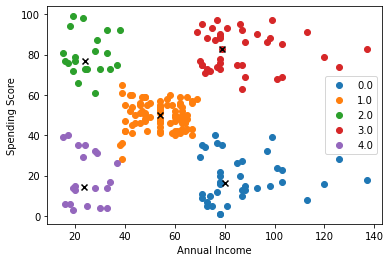

In [225]:
fig, ax = plt.subplots()
for a in np.unique(med_assignments):
    i = np.where(med_assignments == a)
    # add scatter
    ax.scatter(mall_df.Annual_Income.iloc[i], 
               mall_df.Spending_Score.iloc[i], label=a)
    # add center 
    ax.scatter(med_centers.Annual_Income.iloc[int(a)], 
               med_centers.Spending_Score.iloc[int(a)], marker = 'x', c = 'black')
ax.legend()
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

**Do you get exactly the same results when using k-means and k-medians?**

In [16]:
print('The total sum within cluster distance to centroid for my k-medians implementation was ' + str(round(min_sum_ds_med,3)))

The total sum within cluster distance to centroid for my k-medians implementation was 2862.072


I get slightly different results where k-medians does slightly better using my metric.  

### Exercise 5

#### Part 1

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data.dataset import random_split
from torchvision import datasets
from sklearn.metrics import confusion_matrix
import PIL

In [2]:
##Do Not Touch This Cell

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, 5)
        self.conv2 = nn.Conv2d(8, 16, 3)
        self.bn1 = nn.BatchNorm2d(8)
        self.bn2 = nn.BatchNorm2d(16)
        self.fc1 = nn.Linear(16*6*6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.max_pool2d(out, 2)
        out = F.relu(self.bn2(self.conv2(out)))
        out = F.max_pool2d(out, 2)
        out = out.view(out.size(0), -1)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out

In [113]:
##Do Not Touch This Cell

device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = Net().to(device)
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.5)
if device =='cuda':
    print("Train on GPU...")
else:
    print("Train on CPU...")

Train on CPU...


In [114]:
##Do Not Touch This Cell
max_epochs = 50

random_seed = 671
torch.manual_seed(random_seed)

In [115]:
train_transform = transforms.Compose(
     [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

test_transform = transforms.Compose(
     [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform)
##TODO: Split the set into 80% train, 20% validation (there are 50K total images)
train_num = int(0.8 * len(dataset))
val_num = len(dataset) - train_num
train_set, val_set = random_split(dataset, [train_num, val_num])

train_loader = torch.utils.data.DataLoader(train_set, batch_size=128, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=128, shuffle=False)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=1, shuffle=False)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Files already downloaded and verified
Files already downloaded and verified


In [116]:
loss_list, acc_list = [], []
loss_list_val, acc_list_val = [], []
criterion = nn.CrossEntropyLoss()

for epoch in range(max_epochs):
    #TODO: set the net to train mode:
    net.train()

    epoch_loss = 0.0
    correct = 0
    for batch_idx, (data, labels) in enumerate(train_loader):
        data, labels = data.to(device), labels.to(device)

        optimizer.zero_grad()
        ##TODO: pass the data into the network and store the output
        outputs = net(data)

        ##TODO: Calculate the cross entropy loss between the output and target 
        loss_fn = torch.nn.CrossEntropyLoss()
        loss = loss_fn(outputs, labels)
        
        ##TODO: Perform backpropagation
        loss.backward()
        optimizer.step()
    
        ##TODO: Get the prediction from the output
        predicted = torch.argmax(outputs, 1)

        ##TODO: Calculate the correct number and add the number to correct
        correct += (predicted == labels).sum().item()

        ##TODO: Add the loss to epoch_loss.
        epoch_loss += loss.item()

    ##TODO: calculate the average loss
    avg_loss = epoch_loss / len(train_set)

    ##TODO: calculate the average accuracy
    avg_acc = correct / len(train_set)

    ##TODO: append average epoch loss to loss list
    loss_list.append(avg_loss)

    ##TODO: append average accuracy to accuracy list
    acc_list.append(avg_acc)

    # validation
    ##TODO: set the model to eval mode
    net.eval()

    with torch.no_grad():
        loss_val = 0.0
        correct_val = 0
        for batch_idx, (data, labels) in enumerate(val_loader):
            data, labels = data.to(device), labels.to(device)
            ##TODO: pass the data into the network and store the output
            outputs = net(data)

            ##TODO: Calculate the cross entropy loss between the output and target 
            loss_fn = torch.nn.CrossEntropyLoss()
            loss = loss_fn(outputs, labels)

            ##TODO: Get the prediction from the output
            predicted = torch.argmax(outputs, 1)

            ##TODO: Calculate the correct number and add the number to correct_val
            correct_val += (predicted == labels).sum().item()

            ##TODO: Add the loss to loss_val
            loss_val += loss.item()

        ##TODO: calculate the average loss of validation
        avg_loss_val = loss_val / len(val_set)

        ##TODO: calculate the average accuracy of validation
        avg_acc_val = correct_val / len(val_set)

        ##TODO: append average epoch loss to loss list of validation
        loss_list_val.append(avg_loss_val)

        ##TODO: append average accuracy to accuracy list of validation
        acc_list_val.append(avg_acc_val)

    print('[epoch %d] loss: %.5f accuracy: %.4f val loss: %.5f val accuracy: %.4f' % (epoch + 1, avg_loss, avg_acc, avg_loss_val, avg_acc_val))

[epoch 1] loss: 0.01585 accuracy: 0.2651 val loss: 0.01338 val accuracy: 0.3792
[epoch 2] loss: 0.01225 accuracy: 0.4210 val loss: 0.01221 val accuracy: 0.4287
[epoch 3] loss: 0.01087 accuracy: 0.4958 val loss: 0.01042 val accuracy: 0.5327
[epoch 4] loss: 0.00997 accuracy: 0.5447 val loss: 0.00977 val accuracy: 0.5580
[epoch 5] loss: 0.00937 accuracy: 0.5763 val loss: 0.00943 val accuracy: 0.5765
[epoch 6] loss: 0.00896 accuracy: 0.5970 val loss: 0.00955 val accuracy: 0.5872
[epoch 7] loss: 0.00866 accuracy: 0.6091 val loss: 0.00908 val accuracy: 0.5902
[epoch 8] loss: 0.00839 accuracy: 0.6216 val loss: 0.00860 val accuracy: 0.6168
[epoch 9] loss: 0.00815 accuracy: 0.6318 val loss: 0.00856 val accuracy: 0.6243
[epoch 10] loss: 0.00794 accuracy: 0.6416 val loss: 0.00846 val accuracy: 0.6247
[epoch 11] loss: 0.00776 accuracy: 0.6507 val loss: 0.00878 val accuracy: 0.6108
[epoch 12] loss: 0.00757 accuracy: 0.6607 val loss: 0.00829 val accuracy: 0.6316
[epoch 13] loss: 0.00741 accuracy: 0.

#### Part 2

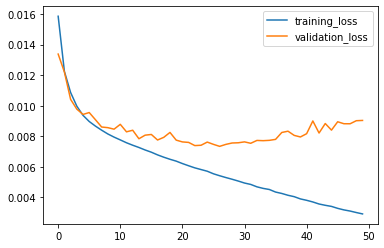

In [117]:
##TODO: Plot the training losses and validation losses
plt.plot(range(max_epochs), loss_list, label ='training_loss')
plt.plot(range(max_epochs), loss_list_val, label ='validation_loss')
plt.legend()
plt.show()

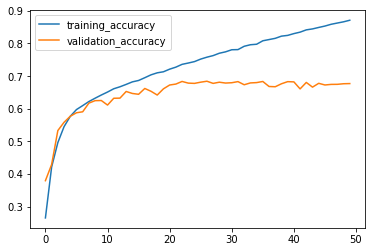

In [118]:
##TODO: Plot the training accuracies and validation accuracies
plt.plot(range(max_epochs), acc_list, label ='training_accuracy')
plt.plot(range(max_epochs), acc_list_val, label ='validation_accuracy')
plt.legend()
plt.show()

This model does overfit. Around epoch 10 onwards, the training accuracy continues to increase (and vice versa for loss) while the validation accuracy starts to taper off - a sure sign of overfitting. 

#### Part 3

In [119]:
#Test
true_labels = []
predictions = []
correct_test = 0
net.eval()
with torch.no_grad():
    for batch_idx, (data, label) in enumerate(test_loader):
        data, label = data.to(device), label.to(device)
        ##TODO: pass the data into the network and store the output
        outputs = net(data)

        ##TODO: Get the prediction from the output
        predicted = torch.argmax(outputs, 1)
        
        ##TODO: Calculate the correct number and add the number to correct_test
        correct_test += (predicted == label).sum().item()

        ##TODO: update predictions list and true label list
        predictions.append(predicted)
        true_labels.append(label)
        ##We can directly append the value because here batch_size=1


print('Accuracy on the 10000 test images: %.2f %%' % (100 * correct_test / len(test_set)))

Accuracy on the 10000 test images: 67.79 %


In [127]:
test = [x.numpy() for x in predictions]
test2 = [x.numpy() for x in true_labels]

In [128]:
##TODO: print the confusion matrix of test set
##You can use sklearn.metrics.confusion_matrix
confusion_matrix(test, test2)

array([[761,  27,  62,  34,  28,  16,  17,  22, 115,  53],
       [ 32, 836,  12,  22,   4,  12,  12,   8,  65, 107],
       [ 55,   8, 579,  90,  64,  56,  54,  26,  22,  12],
       [ 12,  14,  56, 437,  48, 169,  66,  26,  14,   9],
       [ 49,   5, 107,  77, 668,  69,  61,  61,  11,  10],
       [  5,   4,  60, 168,  30, 534,  36,  58,   4,   5],
       [  9,   5,  39,  64,  40,  30, 728,   7,   3,  11],
       [ 24,   6,  66,  83, 106, 106,  20, 780,  12,  41],
       [ 36,  19,  13,   9,   8,   6,   1,   0, 724,  20],
       [ 17,  76,   6,  16,   4,   2,   5,  12,  30, 732]])

Class 3 has the least amount of correctly classified with only 437. This intuitively makes sense because the digit 3 has components (the rounded curves) that resemble other digits (in this case, it appears to be mixing up for 5 the most which makes sense because these two digits on their lower half are the exact same). 